In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os  # the files in this drive
os.chdir("/content/drive/MyDrive/my work/news sorting")
!ls

'BBC News Sample Solution.csv'	'BBC News Train.csv'   Untitled.ipynb
'BBC News Test.csv'		 train_cleaned.csv


In [51]:
pd.read_csv("BBC News Sample Solution.csv") #solutions look like

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics
...,...,...
730,1923,sport
731,373,tech
732,1704,business
733,206,entertainment


In [52]:
train_db=pd.read_csv("BBC News Train.csv")  #train datset

In [53]:
test_db=pd.read_csv("BBC News Test.csv")  #test dataset

In [54]:
train_db.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [55]:
train_db.groupby('Category').count()

,ArticleId,Text
Category,,
business,336,336
entertainment,273,273
politics,274,274
sport,346,346
tech,261,261


Text(0.5, 0, 'Number of articles')

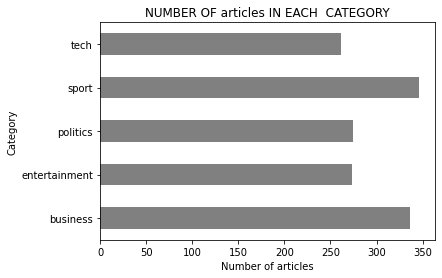

In [56]:
# fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','darkblue','darkblue','darkblue']
train_db.groupby('Category').count().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF articles IN EACH  CATEGORY')

plt.legend('',frameon=False)
plt.xlabel('Number of articles', fontsize = 10)

In [57]:
train_db["Text"][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [58]:
train_db.shape

(1490, 3)

In [59]:
test_db.shape

(735, 2)

In [60]:
# HOW TO CLEAN YOUR DATA FOR NLP
# Remove punctuation
# Tokenize
# Remove stop words
# Stem
# Lemmatize

In [61]:
import string as str
str.punctuation 

import re

![](https://miro.medium.com/max/426/1*cBCVyPufn4l8lZXjy93s8Q.jpeg)

In [62]:
# REMOVE PUNCTIONS IN THE DATASET

def remove_punc(text):
    text_nopunc="".join([char for char in text if char not in str.punctuation]) #remove all the punctions 
    return text_nopunc

train_db["punc_cleaned"]=train_db["Text"].apply(lambda x : remove_punc(x))

train_db.head()

,ArticleId,Text,Category,punc_cleaned
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...


![](https://miro.medium.com/max/1050/0*EKgminT7W-0R4Iae.png)

In [63]:
#MAKE TOKENS IN THE DATASET

def tokenize(text):
    tokens =re.split("\W+",text)  #remove the characters and dash characters 
    return tokens

train_db["tokenized_text"]=train_db["punc_cleaned"].apply(lambda x : tokenize(x))

train_db.head()

,ArticleId,Text,Category,punc_cleaned,tokenized_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo..."


In [64]:
import nltk
nltk.download("all")

from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to /root/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to /root/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [65]:
stop_words=stopwords.words('english')

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/Stop-word-removal-using-NLTK.png)

In [66]:
##REMOVE STOP WORDS 

def remove_stopwords(token_list):
  text=[word for word in token_list if word not in stop_words]
  return text 

train_db["text_nostop"]=train_db["tokenized_text"].apply(lambda x: remove_stopwords(x))

train_db

,ArticleId,Text,Category,punc_cleaned,tokenized_text,text_nostop
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former..."
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,"[double, eviction, from, big, brother, model, ...","[double, eviction, big, brother, model, capric..."
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,"[dj, double, act, revamp, chart, show, dj, duo...","[dj, double, act, revamp, chart, show, dj, duo..."
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,"[weak, dollar, hits, reuters, revenues, at, me...","[weak, dollar, hits, reuters, revenues, media,..."
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,"[apple, ipod, family, expands, market, apple, ...","[apple, ipod, family, expands, market, apple, ..."


In [67]:
import nltk
#stemmig
#preprocessing data using stemming
ps = nltk.PorterStemmer()
ps

<PorterStemmer>

![](https://qph.cf2.quoracdn.net/main-qimg-187b045c480fa7c0b16869daa0661b5a)

In [68]:
def stemming(tokenized_text):
  text =[ps.stem(word) for word in tokenized_text]
  return text

train_db["stemmed_text"]=train_db["tokenized_text"].apply(lambda x : stemming(x))

train_db.head()

,ArticleId,Text,Category,punc_cleaned,tokenized_text,text_nostop,stemmed_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defenc, lawyer, def..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, busi, confid, slide, german, busi, co..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indic, econom, gloom, citizen, in,..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyl, govern, mobil, choic, faster, bette..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, boss, in, 168m, payout, eighteen, form..."


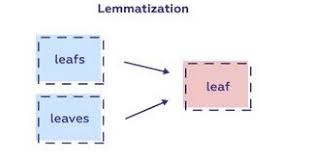

In [69]:
wn =nltk.WordNetLemmatizer()

def Lemmatizing_text(tokenized_text):
  text =[wn.lemmatize(word) for word in tokenized_text]
  return text

train_db["lemmatizing_text"]=train_db["text_nostop"].apply(lambda x:Lemmatizing_text(x))

train_db.head()

,ArticleId,Text,Category,punc_cleaned,tokenized_text,text_nostop,stemmed_text,lemmatizing_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defenc, lawyer, def...","[worldcom, exboss, launch, defence, lawyer, de..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, busi, confid, slide, german, busi, co...","[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indic, econom, gloom, citizen, in,...","[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyl, govern, mobil, choic, faster, bette...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, boss, in, 168m, payout, eighteen, form...","[enron, boss, 168m, payout, eighteen, former, ..."


In [70]:
print(train_db.iloc[:1,:]["Text"])
print(train_db.iloc[:1,:]["punc_cleaned"])
print(train_db.iloc[:1,:]["tokenized_text"])
print(train_db.iloc[:1,:]["text_nostop"])
print(train_db.iloc[:1,:]["stemmed_text"])
print(train_db.iloc[:1,:]["lemmatizing_text"])

0    worldcom ex-boss launches defence lawyers defe...
Name: Text, dtype: object
0    worldcom exboss launches defence lawyers defen...
Name: punc_cleaned, dtype: object
0    [worldcom, exboss, launches, defence, lawyers,...
Name: tokenized_text, dtype: object
0    [worldcom, exboss, launches, defence, lawyers,...
Name: text_nostop, dtype: object
0    [worldcom, exboss, launch, defenc, lawyer, def...
Name: stemmed_text, dtype: object
0    [worldcom, exboss, launch, defence, lawyer, de...
Name: lemmatizing_text, dtype: object


In [71]:
# lemmatizing_text
train_db.iloc[:1,:]["lemmatizing_text"][0]

['worldcom',
 'exboss',
 'launch',
 'defence',
 'lawyer',
 'defending',
 'former',
 'worldcom',
 'chief',
 'bernie',
 'ebbers',
 'battery',
 'fraud',
 'charge',
 'called',
 'company',
 'whistleblower',
 'first',
 'witness',
 'cynthia',
 'cooper',
 'worldcom',
 'exhead',
 'internal',
 'accounting',
 'alerted',
 'director',
 'irregular',
 'accounting',
 'practice',
 'u',
 'telecom',
 'giant',
 '2002',
 'warning',
 'led',
 'collapse',
 'firm',
 'following',
 'discovery',
 '11bn',
 '57bn',
 'accounting',
 'fraud',
 'mr',
 'ebbers',
 'pleaded',
 'guilty',
 'charge',
 'fraud',
 'conspiracy',
 'prosecution',
 'lawyer',
 'argued',
 'mr',
 'ebbers',
 'orchestrated',
 'series',
 'accounting',
 'trick',
 'worldcom',
 'ordering',
 'employee',
 'hide',
 'expense',
 'inflate',
 'revenue',
 'meet',
 'wall',
 'street',
 'earnings',
 'estimate',
 'm',
 'cooper',
 'run',
 'consulting',
 'business',
 'told',
 'jury',
 'new',
 'york',
 'wednesday',
 'external',
 'auditor',
 'arthur',
 'andersen',
 'approv

## Bag of Words\

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

An early reference to "bag of words" in a linguistic context can be found in Zellig Harris's 1954 article on Distributional Structure.

The Bag-of-words model is one example of a Vector space model.



![](https://www.askpython.com/wp-content/uploads/2020/12/Bag-of-Words-model-1024x335.jpg)

In [72]:
# def clean_text(text):
#     text = "".join([word.lower() for word in text if word not in str.punctuation])
#     tokens = re.split('\W+', text)
#     text = [ps.stem(word) for word in tokens if word not in stopwords]
#     return text

![](https://miro.medium.com/max/1102/1*frNDlNJWPRNb9aNjtct-Cw.png)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# corpus = [
# ...     'This is the first document.',
# ...     'This document is the second document.',
# ...     'And this is the third one.',
# ...     'Is this the first document?',
# ... ]

In [74]:
count_vect = CountVectorizer()
    # analyzer=clean_text)

In [75]:
corpus=[i for i in train_db["Text"]]

In [76]:
X_counts = count_vect.fit_transform(corpus)
print(X_counts.shape)
print(count_vect.get_feature_names())

(1490, 24746)
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '0400', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '060', '0630', '069', '07', '070', '0700', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000m', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '106m', '107', '108', '1080', '109', '109m', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1215', '1230', '124bn', '125', '125m', '126', '127th', '128', '129', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1

In [77]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,00,000,0001,000bn,000m,000th,001,001and,001st,0051,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vectorizing Raw Data: N-Grams
N-Grams
"plata o plomo means silver or lead"

n	Name	Tokens
2	bigram	["plata o", "o plomo", "plomo means", "means silver", "silver or","or lead"]
3	trigram	["plata o plomo", "o plomo means", "plomo means silver", "means silver or ", "silver or lead"]



![](https://kavita-ganesan.com/wp-content/uploads/image-5.png)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer="word") # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(corpus)
print(X_counts.shape)
print(ngram_vect.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,00 and,00 for,00 mark,00 per,000 12,000 130,000 133,000 267,000 29,000 292,...,zorro starring,zuluaga colombia,zurich according,zurich and,zurich premiership,zutons at,zvonareva has,zvonareva russia,zvonareva struggled,zvonareva while
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TfidfVectorizer

Scikit-learn’s Tfidftransformer and Tfidfvectorizer aim to do the same thing, which is to convert a collection of raw documents to a matrix of TF-IDF features. The differences between the two modules can be quite confusing and it’s hard to know when to use which. This article shows you how to correctly use each module, the differences between the two and some guidelines on what to use when.


![](https://kavita-ganesan.com/wp-content/uploads/730.png)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(corpus)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1490, 24746)
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '04', '0400', '041', '04bn', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '060', '0630', '069', '07', '070', '0700', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000m', '1000th', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105bn', '105m', '106', '106m', '107', '108', '1080', '109', '109m', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1215', '1230', '124bn', '125', '125m', '126', '127th', '128', '129', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1

In [81]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,00,000,0001,000bn,000m,000th,001,001and,001st,0051,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.020274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.017389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

       00       000  0001  000bn  000m  000th  001  001and  001st  0051  ...  \
0     0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
1     0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
2     0.0  0.020274   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
3     0.0  0.017389   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
4     0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
...   ...       ...   ...    ...   ...    ...  ...     ...    ...   ...  ...   
1485  0.0  0.030012   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
1486  0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
1487  0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
1488  0.0  0.000000   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   
1489  0.0  0.023923   0.0    0.0   0.0    0.0  0.0     0.0    0.0   0.0  ...   

      zonealarm  zones  zoom  zooms  zo

In [83]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [84]:
train_db2=train_db.copy()

In [85]:
# Create a new column 'category_id' with encoded categories 
train_db2['article_category'] = train_db2['Category'].factorize()[0]
train_db2

,ArticleId,Text,Category,punc_cleaned,tokenized_text,text_nostop,stemmed_text,lemmatizing_text,article_category
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defenc, lawyer, def...","[worldcom, exboss, launch, defence, lawyer, de...",0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, busi, confid, slide, german, busi, co...","[german, business, confidence, slide, german, ...",0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indicates, economic, gloom, citize...","[bbc, poll, indic, econom, gloom, citizen, in,...","[bbc, poll, indicates, economic, gloom, citize...",0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyl, govern, mobil, choic, faster, bette...","[lifestyle, governs, mobile, choice, faster, b...",1
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, boss, in, 168m, payout, eighteen, form...","[enron, boss, 168m, payout, eighteen, former, ...",0
...,...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,"[double, eviction, from, big, brother, model, ...","[double, eviction, big, brother, model, capric...","[doubl, evict, from, big, brother, model, capr...","[double, eviction, big, brother, model, capric...",4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,"[dj, double, act, revamp, chart, show, dj, duo...","[dj, double, act, revamp, chart, show, dj, duo...","[dj, doubl, act, revamp, chart, show, dj, duo,...","[dj, double, act, revamp, chart, show, dj, duo...",4
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,"[weak, dollar, hits, reuters, revenues, at, me...","[weak, dollar, hits, reuters, revenues, media,...","[weak, dollar, hit, reuter, revenu, at, media,...","[weak, dollar, hit, reuters, revenue, medium, ...",0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,"[apple, ipod, family, expands, market, apple, ...","[apple, ipod, family, expands, market, apple, ...","[appl, ipod, famili, expand, market, appl, ha,...","[apple, ipod, family, expands, market, apple, ...",1


In [86]:
train_db2=train_db2.drop(columns=['punc_cleaned', 'tokenized_text','text_nostop', 'stemmed_text', 'lemmatizing_text'])
train_db2

,ArticleId,Text,Category,article_category
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,0
1488,1587,apple ipod family expands market apple has exp...,tech,1


In [87]:
category_id_df = train_db[['Text', 'article_category']].drop_duplicates()
category_to_id = dict(category_id_df.values)

In [88]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(train_db2["Text"]).toarray()
labels = train_db2.article_category
print("Each of the %d is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 1490 is represented by 9927 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

## unigrams  ,bigrams and trigrams 


![](https://intellipaat.com/blog/wp-content/uploads/2020/05/2.jpg)

In [91]:
X = train_db2['Text'] # Collection of documents
y = train_db2['article_category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [92]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [93]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.977852,0.009668
LogisticRegression,0.975168,0.007725
MultinomialNB,0.972483,0.009312
RandomForestClassifier,0.894631,0.016711


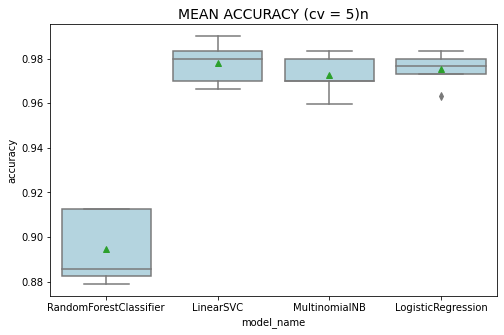

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [97]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               train_db2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [110]:
# Classification report
print('CLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred))
                                    # target_names= train_db['ArticleId'].unique()))

CLASSIFICATIION METRICSn
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        83
           1       0.97      1.00      0.99        70
           2       0.97      1.00      0.99        74
           3       1.00      1.00      1.00        79
           4       1.00      0.99      0.99        67

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



In [111]:
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(8,8))
# sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
#             xticklabels=category_id_df.article_category.values, 
#             yticklabels=category_id_df.article_category.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [116]:

complaint="Syed Anas Ali, in a statement, said, “A film named Pathan has been made, in which Shah Rukh Khan is a hero, people see him, like him. I fervently urge the Censor Board and want to tell all the theatre people of India that you should not permit this film to take place since it would send the incorrect message, break the peace, and injure all the people in this country."

print(model.predict(fitted_vectorizer.transform([complaint])))

[4]


In [125]:
train_db2[["Category","article_category"]].drop_duplicates()

dict({0:"business",1:"tech",2:"politics",3:"sport",4:"entertainment"})

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [126]:
import pickle as pk

# save the model to disk
filename = 'model_nlp.pk'
pk.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))


In [129]:
test_results=model.predict(fitted_vectorizer.transform(test_db["Text"]))

In [148]:
def int_str(x):
  if x ==0:
    value="business"

  elif x==1:
    value="tech"

  elif x==2:
    value="politics"

  elif x==3:
    value="sport"

  else:
    value="entertainment"

  return value

[int_str(i) for i in test_results]

['sport',
 'tech',
 'sport',
 'business',
 'sport',
 'sport',
 'politics',
 'politics',
 'entertainment',
 'business',
 'business',
 'tech',
 'politics',
 'tech',
 'entertainment',
 'sport',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'sport',
 'business',
 'politics',
 'tech',
 'business',
 'business',
 'sport',
 'sport',
 'sport',
 'business',
 'entertainment',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'tech',
 'sport',
 'tech',
 'entertainment',
 'business',
 'politics',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'tech',
 'politics',
 'tech',
 'entertainment',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'business',
 'entertainment',
 'sport',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'business',
 'politics',
 'tech',
 'sport',
 'tech',
 'tech',
 'tech',
 'entertainment',
 'politics',
 'sport',
 'enterta